In [1]:
import pandas as pd
import seaborn as sn

In [2]:
names=["System", "Allocation", "R", "numSamples", "sumX", "Total Time", "numVms", "osFactor"]
df = pd.read_csv("2019_12_10_Q1.csv", header=None, names=names)

In [363]:
df.head()

System Allocation         R  numSamples  sumX  Total Time  numVms  osFactor
0     98   Original  0.992789       21635   156    0.006029      98       0.0
1     98   Original  0.993131       22710   156    0.005692      98       0.0
2     98   Original  0.994062       26273   156    0.006259      98       0.0
3     98   Original  0.993938       25732   156    0.006240      98       0.0
4     98   Original  0.993595       24355   156    0.005844      98       0.0

In [3]:
# Tables for Question 1
q1 = df[df["osFactor"] == 0]

def printTable(df, col, methods):
    avg = q1.groupby(["Allocation", "System"])[col].mean().unstack()
    std = q1.groupby(["Allocation", "System"])[col].std().unstack()
    
    print("\\textbf{", methods[0], "} & \\textbf{FF} & \\textbf{", methods[2], "} \\\\")
    for system in avg:
        print(system, end=" & ")
        for i, method in enumerate(methods):
            
            if avg[system][method] == 0 or avg[system][method] == 11:
                print("\\textbf{", end="")
            
            print("{0:4.4f} $\pm$ {1:4,.4f} ".format(avg[system][method], std[system][method]), end=" ")
            if avg[system][method] == 0 or avg[system][method] == 11:
                print("}", end="")
            if i == len(methods)-1:
                print("\\\\")
            else:
                print(" & ", end ="")

# Methods used in Allocation
methods = ["Original", "Greedy", "RR"]

printTable(q1, "R", methods)
print("")
printTable(q1, "Total Time", methods)
print("")
printTable(q1, "sumX", methods)
print("")
printTable(q1, "numSamples", methods)
print("")


\textbf{ Original } & \textbf{FF} & \textbf{ RR } \\
98 & 0.9932 $\pm$ 0.0005   & 0.9862 $\pm$ 0.0013   & 0.9859 $\pm$ 0.0009  \\
98_Increased & 0.9926 $\pm$ 0.0007   & 0.9931 $\pm$ 0.0005   & 0.9931 $\pm$ 0.0005  \\
XSEDE_One & 0.8558 $\pm$ 0.3008   & \textbf{0.0000 $\pm$ 0.0000  } & \textbf{0.0000 $\pm$ 0.0000  }\\
XSEDE_Two & 0.9727 $\pm$ 0.0012   & \textbf{0.0000 $\pm$ 0.0000  } & \textbf{0.0000 $\pm$ 0.0000  }\\

\textbf{ Original } & \textbf{FF} & \textbf{ RR } \\
98 & 0.0056 $\pm$ 0.0005   & 0.0079 $\pm$ 0.0009   & 0.0073 $\pm$ 0.0007  \\
98_Increased & 0.0052 $\pm$ 0.0006   & 0.0122 $\pm$ 0.0009   & 0.0129 $\pm$ 0.0010  \\
XSEDE_One & 0.0041 $\pm$ 0.0015   & 0.0022 $\pm$ 0.0004   & 0.0023 $\pm$ 0.0002  \\
XSEDE_Two & 0.0080 $\pm$ 0.0005   & 0.0012 $\pm$ 0.0001   & 0.0016 $\pm$ 0.0002  \\

\textbf{ Original } & \textbf{FF} & \textbf{ RR } \\
98 & 156.0000 $\pm$ 0.0000   & 154.7000 $\pm$ 0.4830   & 154.6000 $\pm$ 0.5164  \\
98_Increased & 155.7000 $\pm$ 0.4830   & 155.9000 $\pm$ 

In [373]:
# Tables for Question 2

def printQ2Table(df, col):
    avg = df.groupby(["osFactor", "System", "Allocation"])[col].mean().unstack()
    std = df.groupby(["osFactor", "System", "Allocation"])[col].std().unstack()

    methods   = ["Original", "Greedy", "RR"]
    systems   = ["98", "98_Increased", "XSEDE_One", "XSEDE_Two"]
    systemNames = ["98", "98 Enhanced", "XSEDE One", "XSEDE Two"]
    osFactors = [i/10.0 for i in range(0,11)]

    for i, system in enumerate(systemNames):
        print(system, end="")
        if i == len(systems)-1:
                print("\\\\")
        else:
            print(" & ", end ="")
    for method in methods:
        print("\multicolumn{5}{|c|}{\\textbf{", method, " Allocation Method}} \\\\")
            
        for osFactor in osFactors:
            print(osFactor, end=" & ")
            for i, system in enumerate(systems):
                if avg[method][osFactor][system] == 0 or avg[method][osFactor][system] == 11:
                    print("\\textbf{", end="")
                print("{0:2,.2f} $\pm$ {1:2,.2f}".format(avg[method][osFactor][system], std[method][osFactor][system]), end=" ")
                if avg[method][osFactor][system] == 0 or avg[method][osFactor][system] == 11:
                    print("}", end="")
                if i == len(systems)-1:
                    print("\\\\")
                else:
                    print(" & ", end ="")

        print("")

# Methods used in Allocation
methods = ["Original", "Greedy", "RR"]

print("********************** Reliability **********************")
printQ2Table(df, "R")
print("")

print("********************** Time **********************")
printQ2Table(df, "Total Time")
print("")

print("********************** Failures **********************")
printQ2Table(df, "sumX")
print("")

print("********************** Samples **********************")
printQ2Table(df, "numSamples")
print("")

********************** Reliability **********************
98 & 98 Enhanced & XSEDE One & XSEDE Two\\
\multicolumn{5}{|c|}{\textbf{ Original  Allocation Method}} \\
0.0 & 0.99 $\pm$ 0.00  & 0.99 $\pm$ 0.00  & 0.86 $\pm$ 0.30  & 0.97 $\pm$ 0.00 \\
0.1 & 0.99 $\pm$ 0.00  & 0.99 $\pm$ 0.00  & 0.85 $\pm$ 0.30  & 0.97 $\pm$ 0.00 \\
0.2 & 0.99 $\pm$ 0.00  & 0.99 $\pm$ 0.00  & 0.86 $\pm$ 0.30  & 0.97 $\pm$ 0.00 \\
0.3 & 0.99 $\pm$ 0.00  & 0.99 $\pm$ 0.00  & 0.85 $\pm$ 0.30  & 0.97 $\pm$ 0.00 \\
0.4 & 0.99 $\pm$ 0.00  & 0.99 $\pm$ 0.00  & 0.86 $\pm$ 0.30  & 0.97 $\pm$ 0.00 \\
0.5 & 0.99 $\pm$ 0.00  & 0.99 $\pm$ 0.00  & 0.86 $\pm$ 0.30  & 0.97 $\pm$ 0.00 \\
0.6 & 0.99 $\pm$ 0.00  & 0.99 $\pm$ 0.00  & 0.95 $\pm$ 0.00  & 0.98 $\pm$ 0.00 \\
0.7 & 0.99 $\pm$ 0.00  & 0.99 $\pm$ 0.00  & 0.85 $\pm$ 0.30  & 0.88 $\pm$ 0.31 \\
0.8 & 0.99 $\pm$ 0.00  & 0.99 $\pm$ 0.00  & 0.85 $\pm$ 0.30  & 0.88 $\pm$ 0.31 \\
0.9 & 0.99 $\pm$ 0.00  & 0.89 $\pm$ 0.31  & 0.95 $\pm$ 0.00  & 0.97 $\pm$ 0.00 \\
1.0 & 0.99 $\pm$

In [170]:
orig = df[df["Allocation"]=="Original"]
ff = df[df["Allocation"]=="Greedy"]
rr = df[df["Allocation"]=="RR"]

In [64]:
SystemCat = df["System"].astype("category").cat.codes
SystemCat.columns = ["SystemCat"]
df = pd.concat([df, SystemCat], axis=1)
df.rename(columns={0: 'SystemCat'}, inplace=True)


System Allocation         R  numSamples  sumX  Total Time  numVms  \
0               98   Original  0.993573       24274   156    0.007129      98   
1               98   Original  0.992425       20595   156    0.005093      98   
2               98   Original  0.992074       19682   156    0.004797      98   
3               98   Original  0.992173       19931   156    0.005636      98   
4               98   Original  0.992416       20570   156    0.005037      98   
5               98   Original  0.992905       21987   156    0.005340      98   
6               98   Original  0.992928       22058   156    0.006789      98   
7               98   Original  0.993649       24562   156    0.006150      98   
8               98   Original  0.993610       24414   156    0.006763      98   
9               98   Original  0.993178       22866   156    0.006024      98   
10    98_Increased   Original  0.993397       23625   156    0.005787      98   
11    98_Increased   Original  0.991966       19293   155    0.005195      98   
12    98_Increased   Original  0.993068       22505   156    0.005710      98   
13    98_Increased   Original  0.991984       19337   155    0.004709      98   
14    98_Increased   Original  0.992754       21530   156    0.005573      98   
15    98_Increased   Original  0.993618       24444   156    0.006422      98   
16    98_Increased   Original  0.993328       23381   156    0.005679      98   
17    98_Increased   Original  0.993210       22974   156    0.005846      98   
18    98_Increased   Original  0.992783       21616   156    0.005261      98   
19    98_Increased   Original  0.993294       23263   156    0.006438      98   
20       XSEDE_One   Original  0.937553        2354   147    0.003254   21567   
21       XSEDE_One   Original  0.949457        2948   149    0.005504   21567   
22       XSEDE_One   Original  0.954833        3321   150    0.007086   21567   
23       XSEDE_One   Original  0.950646        3019   149    0.004360   21567   
24       XSEDE_One   Original  0.946953        2790   148    0.004106   21567   
25       XSEDE_One   Original  0.943555        2622   148    0.003854   21567   
26       XSEDE_One   Original  0.950267        2996   149    0.004360   21567   
27       XSEDE_One   Original  0.952028        3106   149    0.004328   21567   
28       XSEDE_One   Original  0.945688        2725   148    0.003808   21567   
29       XSEDE_One   Original  0.952442        3133   149    0.004597   21567   
...            ...        ...       ...         ...   ...         ...     ...   
1290  98_Increased         RR  0.992912       22009   156    0.013064      98   
1291  98_Increased         RR  0.993515       24056   156    0.013253      98   
1292  98_Increased         RR  0.991823       18956   155    0.010478      98   
1293  98_Increased         RR  0.992344       20377   156    0.011110      98   
1294  98_Increased         RR  0.992735       21472   156    0.012001      98   
1295  98_Increased         RR  0.992575       21010   156    0.011888      98   
1296  98_Increased         RR  0.992507       20820   156    0.011785      98   
1297  98_Increased         RR  0.992554       20951   156    0.011369      98   
1298  98_Increased         RR  0.991591       18433   155    0.010371      98   
1299  98_Increased         RR  0.992757       21539   156    0.011807      98   
1300     XSEDE_One         RR  0.993680       24683   156    2.264180   21567   
1301     XSEDE_One         RR  0.992235       20090   156    1.875160   21567   
1302     XSEDE_One         RR  0.992587       21044   156    1.945230   21567   
1303     XSEDE_One         RR  0.991710       18697   155    1.710360   21567   
1304     XSEDE_One         RR  0.992563       20976   156    1.971880   21567   
1305     XSEDE_One         RR  0.992873       21888   156    2.049470   21567   
1306     XSEDE_One         RR  0.993806       25184   156    2.385770   21567   
1307     XSEDE_One         RR  0.993031    

System          98  98_Increased  XSEDE_One  XSEDE_Two
osFactor                                              
0.0       0.992893      0.992940   0.948342   0.876355
0.1       0.992908      0.993119   0.975253   0.974050
0.2       0.992873      0.993248   0.987017   0.992150
0.3       0.992769      0.993061   0.993792   0.992733
0.4       0.992805      0.993173   0.993566   0.993270
0.5       0.993250      0.992850   0.993193   0.999720
0.6       0.992905      0.993040   0.999838   0.999880
0.7       0.993091      0.993368   0.999878   0.999878
0.8       0.993397      0.993061   0.999875   0.999881
0.9       0.993028      0.993213   0.999878   0.999916
1.0       0.993067      0.993321   0.999955   0.999958

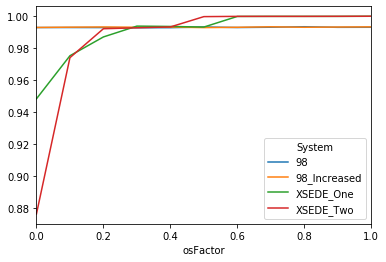

In [200]:
# orig = orig[orig["R"] > 0]
avg = orig.groupby(["System", "osFactor"]).mean()
std = orig.groupby(["System", "osFactor"]).std()

avgU = avg["R"].unstack()
stdU = std["R"].unstack()

avgU = avgU.transpose()
stdU = stdU.transpose()

avgU.plot()
avgU

In [380]:
names=["System", "Allocation", "R", "numSamples", "sumX", "TotalTime", "numVms", "osFactor"]
df2 = pd.read_csv("2019_12_10_Q3.csv", header=None, names=names)


avgR = df2.groupby(["osFactor", "System", "Allocation"])["R"].mean().unstack()
stdR = df2.groupby(["osFactor", "System", "Allocation"])["R"].std().unstack()

avgNumVms = df2.groupby(["osFactor", "System", "Allocation"])["numVms"].mean().unstack()

methods     = ["Greedy", "RR"]
systems     = ["XSEDE_One", "XSEDE_Two"]
systemNames = ["XSEDE One", "XSEDE Two"]
osFactors   = [i/10.0 for i in range(0,11)]

for i, system in enumerate(systemNames):
    print(system, end="")
    if i == len(systems)-1:
            print("\\\\")
    else:
        print(" & ", end ="")
        
for method in methods:
    print("\multicolumn{5}{|c|}{\\textbf{", method, " Allocation Method}} \\\\")

    for osFactor in osFactors:
        print(osFactor, end=" & ")
        
        for i, system in enumerate(systems):
            print("{0:2,.2f} $\pm$ {1:2,.2f}".format(avgR[method][osFactor][system], 
                                                     stdR[method][osFactor][system],
                                                     avgNumVms[method][osFactor][system]), end=" ")
           
        
            if i == len(systems)-1:
                print("\\\\")
            else:
                print(" & ", end ="")

    print("")
        


XSEDE One & XSEDE Two\\
\multicolumn{5}{|c|}{\textbf{ Greedy  Allocation Method}} \\
0.0 & 0.92 $\pm$ 0.01  & 0.57 $\pm$ 0.49 \\
0.1 & 0.92 $\pm$ 0.01  & 0.85 $\pm$ 0.30 \\
0.2 & 0.92 $\pm$ 0.01  & 0.94 $\pm$ 0.01 \\
0.3 & 0.83 $\pm$ 0.29  & 0.75 $\pm$ 0.40 \\
0.4 & 0.92 $\pm$ 0.01  & 0.84 $\pm$ 0.30 \\
0.5 & 0.74 $\pm$ 0.39  & 0.75 $\pm$ 0.40 \\
0.6 & 0.83 $\pm$ 0.29  & 0.94 $\pm$ 0.01 \\
0.7 & 0.83 $\pm$ 0.29  & 0.85 $\pm$ 0.30 \\
0.8 & 0.92 $\pm$ 0.01  & 0.94 $\pm$ 0.01 \\
0.9 & 0.92 $\pm$ 0.01  & 0.56 $\pm$ 0.49 \\
1.0 & 0.83 $\pm$ 0.29  & 0.56 $\pm$ 0.48 \\

\multicolumn{5}{|c|}{\textbf{ RR  Allocation Method}} \\
0.0 & 0.64 $\pm$ 0.44  & 0.66 $\pm$ 0.45 \\
0.1 & 0.92 $\pm$ 0.01  & 0.75 $\pm$ 0.39 \\
0.2 & 0.83 $\pm$ 0.29  & 0.85 $\pm$ 0.30 \\
0.3 & 0.75 $\pm$ 0.37  & 0.75 $\pm$ 0.39 \\
0.4 & 0.65 $\pm$ 0.45  & 0.56 $\pm$ 0.48 \\
0.5 & 0.92 $\pm$ 0.01  & 0.94 $\pm$ 0.01 \\
0.6 & 0.92 $\pm$ 0.01  & 0.65 $\pm$ 0.45 \\
0.7 & 0.92 $\pm$ 0.01  & 0.75 $\pm$ 0.40 \\
0.8 & 0.93 $\pm$ 0.01

In [6]:
from scipy.stats import kruskal

q1.sample(10)


System Allocation         R  numSamples  sumX  Total Time  numVms  \
45             98     Greedy  0.985892       10987   155    0.007871      98   
7              98   Original  0.993065       22494   156    0.005554      98   
14   98_Increased   Original  0.991906       19150   155    0.004478      98   
84             98         RR  0.985723       10857   155    0.007026      98   
81             98         RR  0.985322       10492   154    0.007499      98   
113     XSEDE_Two         RR  0.000000          11    11    0.001732   13000   
13   98_Increased   Original  0.993349       23455   156    0.005742      98   
35      XSEDE_Two   Original  0.970301        5118   152    0.007596   13000   
94   98_Increased         RR  0.992885       21926   156    0.012218      98   
83             98         RR  0.986201       11233   155    0.007161      98   

     osFactor  
45        0.0  
7         0.0  
14        0.0  
84        0.0  
81        0.0  
113       0.0  
13        0.0  
35        0.0  
94        0.0  
83        0.0

In [37]:
or1 = df[(df["System"] == "98")           & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["R"]
or2 = df[(df["System"] == "98_Increased") & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["R"]
or3 = df[(df["System"] == "XSEDE_One")    & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["R"]
or4 = df[(df["System"] == "XSEDE_Two")    & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["R"]

gr1 = df[(df["System"] == "98")           & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["R"]
gr2 = df[(df["System"] == "98_Increased") & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["R"]
gr3 = df[(df["System"] == "XSEDE_One")    & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["R"]
gr4 = df[(df["System"] == "XSEDE_Two")    & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["R"]

rr1 = df[(df["System"] == "98")           & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["R"]
rr2 = df[(df["System"] == "98_Increased") & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["R"]
rr3 = df[(df["System"] == "XSEDE_One")    & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["R"]
rr4 = df[(df["System"] == "XSEDE_Two")    & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["R"]

# Does the allocation methodo have a significant impact on System Reliablity? (By System)
print("Reliability Value") 
print(kruskal(or1, gr1, rr1))
print(kruskal(or2, gr2, rr2)) # Not Significant
print(kruskal(or3, gr3, rr3))
print(kruskal(or4, gr4, rr4))
print("")

or1 = df[(df["System"] == "98")           & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["numSamples"]
or2 = df[(df["System"] == "98_Increased") & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["numSamples"]
or3 = df[(df["System"] == "XSEDE_One")    & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["numSamples"]
or4 = df[(df["System"] == "XSEDE_Two")    & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["numSamples"]

gr1 = df[(df["System"] == "98")           & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["numSamples"]
gr2 = df[(df["System"] == "98_Increased") & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["numSamples"]
gr3 = df[(df["System"] == "XSEDE_One")    & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["numSamples"]
gr4 = df[(df["System"] == "XSEDE_Two")    & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["numSamples"]

rr1 = df[(df["System"] == "98")           & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["numSamples"]
rr2 = df[(df["System"] == "98_Increased") & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["numSamples"]
rr3 = df[(df["System"] == "XSEDE_One")    & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["numSamples"]
rr4 = df[(df["System"] == "XSEDE_Two")    & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["numSamples"]

# Does the allocation methodo have a significant impact on System Reliablity? (By System)
print("Num Samples Value") 
print(kruskal(or1, gr1, rr1))
print(kruskal(or2, gr2, rr2)) # Not Significant
print(kruskal(or3, gr3, rr3))
print(kruskal(or4, gr4, rr4))
print("")

or1 = df[(df["System"] == "98")           & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["Total Time"]
or2 = df[(df["System"] == "98_Increased") & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["Total Time"]
or3 = df[(df["System"] == "XSEDE_One")    & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["Total Time"]
or4 = df[(df["System"] == "XSEDE_Two")    & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["Total Time"]

gr1 = df[(df["System"] == "98")           & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["Total Time"]
gr2 = df[(df["System"] == "98_Increased") & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["Total Time"]
gr3 = df[(df["System"] == "XSEDE_One")    & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["Total Time"]
gr4 = df[(df["System"] == "XSEDE_Two")    & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["Total Time"]

rr1 = df[(df["System"] == "98")           & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["Total Time"]
rr2 = df[(df["System"] == "98_Increased") & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["Total Time"]
rr3 = df[(df["System"] == "XSEDE_One")    & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["Total Time"]
rr4 = df[(df["System"] == "XSEDE_Two")    & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["Total Time"]

# Does the allocation methodo have a significant impact on System Reliablity? (By System)
print("Failed States Value") 
print(kruskal(or1, gr1, rr1))
print(kruskal(or2, gr2, rr2)) # Not Significant
print(kruskal(or3, gr3, rr3))
print(kruskal(or4, gr4, rr4))
print("")

or1 = df[(df["System"] == "98")           & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["sumX"]
or2 = df[(df["System"] == "98_Increased") & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["sumX"]
or3 = df[(df["System"] == "XSEDE_One")    & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["sumX"]
or4 = df[(df["System"] == "XSEDE_Two")    & (df["osFactor"] == 0) & (df["Allocation"] == "Original")]["sumX"]

gr1 = df[(df["System"] == "98")           & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["sumX"]
gr2 = df[(df["System"] == "98_Increased") & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["sumX"]
gr3 = df[(df["System"] == "XSEDE_One")    & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["sumX"]
gr4 = df[(df["System"] == "XSEDE_Two")    & (df["osFactor"] == 0) & (df["Allocation"] == "Greedy")]["sumX"]

rr1 = df[(df["System"] == "98")           & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["sumX"]
rr2 = df[(df["System"] == "98_Increased") & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["sumX"]
rr3 = df[(df["System"] == "XSEDE_One")    & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["sumX"]
rr4 = df[(df["System"] == "XSEDE_Two")    & (df["osFactor"] == 0) & (df["Allocation"] == "RR")]["sumX"]

# Does the allocation methodo have a significant impact on System Reliablity? (By System)
print("Total Time Value") 
print(kruskal(or1, gr1, rr1))
print(kruskal(or2, gr2, rr2)) # Not Significant
print(kruskal(or3, gr3, rr3))
print(kruskal(or4, gr4, rr4))
print("")

Reliability Value
KruskalResult(statistic=19.519999999999996, pvalue=5.77146221352104e-05)
KruskalResult(statistic=3.1070967741935362, pvalue=0.21149617048856595)
KruskalResult(statistic=23.8477157360406, pvalue=6.6303174900988915e-06)
KruskalResult(statistic=27.488151658767777, pvalue=1.0740480437727982e-06)

Num Samples Value
KruskalResult(statistic=19.519999999999996, pvalue=5.77146221352104e-05)
KruskalResult(statistic=3.1070967741935362, pvalue=0.21149617048856595)
KruskalResult(statistic=17.59241706161138, pvalue=0.00015130565968876828)
KruskalResult(statistic=27.488151658767777, pvalue=1.0740480437727982e-06)

Failed States Value
KruskalResult(statistic=19.8374193548387, pvalue=4.9244657301458235e-05)
KruskalResult(statistic=19.860645161290336, pvalue=4.867609160075165e-05)
KruskalResult(statistic=15.370322580645166, pvalue=0.00045959665489036844)
KruskalResult(statistic=24.58064516129032, pvalue=4.596007433266664e-06)

Total Time Value
KruskalResult(statistic=22.324808184143226

In [47]:

for curSystem in ["98", "98_Increased", "XSEDE_One", "XSEDE_Two"]:
    or1  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.0) & (df["Allocation"] == "Original")]["R"]
    or2  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.1) & (df["Allocation"] == "Original")]["R"]
    or3  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.2) & (df["Allocation"] == "Original")]["R"]
    or4  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.3) & (df["Allocation"] == "Original")]["R"]
    or5  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.4) & (df["Allocation"] == "Original")]["R"]
    or6  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.5) & (df["Allocation"] == "Original")]["R"]
    or7  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.6) & (df["Allocation"] == "Original")]["R"]
    or8  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.7) & (df["Allocation"] == "Original")]["R"]
    or9  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.8) & (df["Allocation"] == "Original")]["R"]
    or10 = df[(df["System"] == curSystem) & (df["osFactor"] == 0.9) & (df["Allocation"] == "Original")]["R"]
    or11 = df[(df["System"] == curSystem) & (df["osFactor"] == 1.0) & (df["Allocation"] == "Original")]["R"]

    print(kruskal(or1, or2, or3, or4, or5, or6, or7, or8, or9, or10, or11))
print("")

# Can't use XSEDE below due to failures in RR and FF
for curSystem in ["98", "98_Increased"]:
    or1  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.0) & (df["Allocation"] == "Greedy")]["R"]
    or2  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.1) & (df["Allocation"] == "Greedy")]["R"]
    or3  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.2) & (df["Allocation"] == "Greedy")]["R"]
    or4  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.3) & (df["Allocation"] == "Greedy")]["R"]
    or5  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.4) & (df["Allocation"] == "Greedy")]["R"]
    or6  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.5) & (df["Allocation"] == "Greedy")]["R"]
    or7  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.6) & (df["Allocation"] == "Greedy")]["R"]
    or8  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.7) & (df["Allocation"] == "Greedy")]["R"]
    or9  = df[(df["System"] == curSystem) & (df["osFactor"] == 0.8) & (df["Allocation"] == "Greedy")]["R"]
    or10 = df[(df["System"] == curSystem) & (df["osFactor"] == 0.9) & (df["Allocation"] == "Greedy")]["R"]
    or11 = df[(df["System"] == curSystem) & (df["osFactor"] == 1.0) & (df["Allocation"] == "Greedy")]["R"]

    print(kruskal(or1, or2, or3, or4, or5, or6, or7, or8, or9, or10, or11))

    or1  = df[(df["System"] ==curSystem) & (df["osFactor"] == 0.0) & (df["Allocation"] == "RR")]["R"]
    or2  = df[(df["System"] ==curSystem) & (df["osFactor"] == 0.1) & (df["Allocation"] == "RR")]["R"]
    or3  = df[(df["System"] ==curSystem) & (df["osFactor"] == 0.2) & (df["Allocation"] == "RR")]["R"]
    or4  = df[(df["System"] ==curSystem) & (df["osFactor"] == 0.3) & (df["Allocation"] == "RR")]["R"]
    or5  = df[(df["System"] ==curSystem) & (df["osFactor"] == 0.4) & (df["Allocation"] == "RR")]["R"]
    or6  = df[(df["System"] ==curSystem) & (df["osFactor"] == 0.5) & (df["Allocation"] == "RR")]["R"]
    or7  = df[(df["System"] ==curSystem) & (df["osFactor"] == 0.6) & (df["Allocation"] == "RR")]["R"]
    or8  = df[(df["System"] ==curSystem) & (df["osFactor"] == 0.7) & (df["Allocation"] == "RR")]["R"]
    or9  = df[(df["System"] ==curSystem) & (df["osFactor"] == 0.8) & (df["Allocation"] == "RR")]["R"]
    or10 = df[(df["System"] ==curSystem) & (df["osFactor"] == 0.9) & (df["Allocation"] == "RR")]["R"]
    or11 = df[(df["System"] ==curSystem) & (df["osFactor"] == 1.0) & (df["Allocation"] == "RR")]["R"]

    print(kruskal(or1, or2, or3, or4, or5, or6, or7, or8, or9, or10, or11))
    
    print("")

KruskalResult(statistic=9.314292605516288, pvalue=0.502558415352558)
KruskalResult(statistic=21.350407556016382, pvalue=0.01877840699887687)
KruskalResult(statistic=7.917829453868136, pvalue=0.6368630666889615)
KruskalResult(statistic=22.056368259464065, pvalue=0.01482000114385353)

KruskalResult(statistic=7.330696439359058, pvalue=0.6938996685594484)
KruskalResult(statistic=10.816706865693197, pvalue=0.37197550556988074)

KruskalResult(statistic=13.259098245360954, pvalue=0.20954399216711958)
KruskalResult(statistic=8.318797365348242, pvalue=0.5977280187146179)

